<a href="https://colab.research.google.com/github/AlexeyTri/Home_work_NN/blob/main/HomeWork_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AlexeyTri/Home_work_NN/refs/heads/main/data/abalone.csv")

In [3]:
df['Sex'] = df["Sex"].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
loss = []
for i in range(1, 51):
    rf_regression = RandomForestRegressor(n_estimators=i, random_state=1)
    crv_predict = cross_val_predict(estimator=rf_regression, X=X, y=y, cv=kf)
    r2 = r2_score(y, crv_predict)
    loss.append(r2)
    print(f"Number forest: {i}, score loss: {r2}")

Number forest: 1, score loss: 0.11183045556945559
Number forest: 2, score loss: 0.3417626141889565
Number forest: 3, score loss: 0.40631541471952837
Number forest: 4, score loss: 0.44492426926060846
Number forest: 5, score loss: 0.4652646211024194
Number forest: 6, score loss: 0.4716092011843045
Number forest: 7, score loss: 0.4768167618430452
Number forest: 8, score loss: 0.48320730275214396
Number forest: 9, score loss: 0.48970057681987345
Number forest: 10, score loss: 0.49576245036266253
Number forest: 11, score loss: 0.4948459040998394
Number forest: 12, score loss: 0.49936513933198545
Number forest: 13, score loss: 0.5033624525520672
Number forest: 14, score loss: 0.5075255241067518
Number forest: 15, score loss: 0.5095046807955507
Number forest: 16, score loss: 0.5117944105171915
Number forest: 17, score loss: 0.515272367828475
Number forest: 18, score loss: 0.5176393441106946
Number forest: 19, score loss: 0.5202440821703147
Number forest: 20, score loss: 0.5198836733354879
Num

In [6]:
loss_df = pd.DataFrame(loss)
loss_df[loss_df.iloc[:, 0] > 0.52].iloc[0,:]

,18
0,0.520244


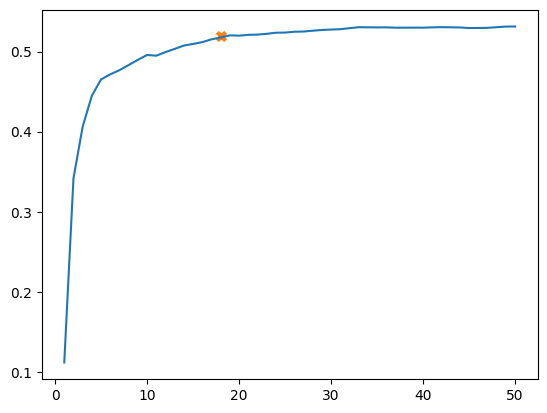

In [7]:
plt.plot(range(1, 51), loss)
plt.scatter(18, 0.52, marker='x', c='#ff7f0e', linewidths=3)